In [8]:
%matplotlib notebook
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
config = tf.ConfigProto(gpu_options=gpu_options)

In [3]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

In [5]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [6]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

In [7]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

In [9]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [11]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

# Alternative losses:
# -------------------
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

In [12]:
mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../../mnist/', one_hot=True)

Extracting ../../../mnist/train-images-idx3-ubyte.gz
Extracting ../../../mnist/train-labels-idx1-ubyte.gz
Extracting ../../../mnist/t10k-images-idx3-ubyte.gz
Extracting ../../../mnist/t10k-labels-idx1-ubyte.gz


In [13]:
sess = tf.Session(config=config)
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
if not os.path.exists('out/'):
    os.makedirs('out/')

<IPython.core.display.Javascript object>


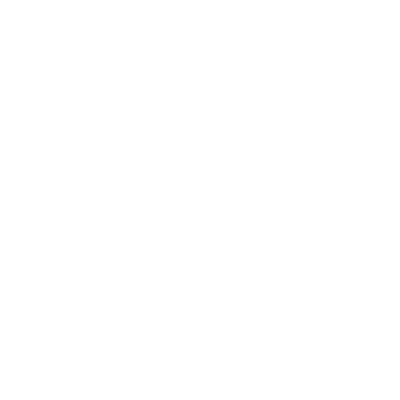

Iter: 0
D loss: 1.787
G_loss: 1.589
()


<IPython.core.display.Javascript object>


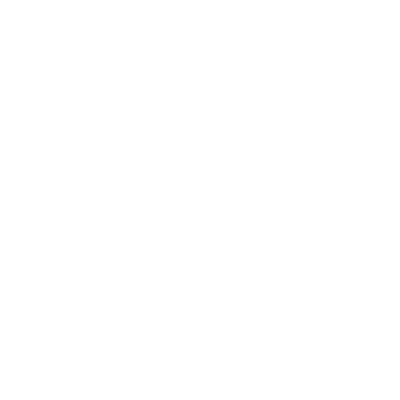

Iter: 10000
D loss: 0.3702
G_loss: 3.122
()


<IPython.core.display.Javascript object>


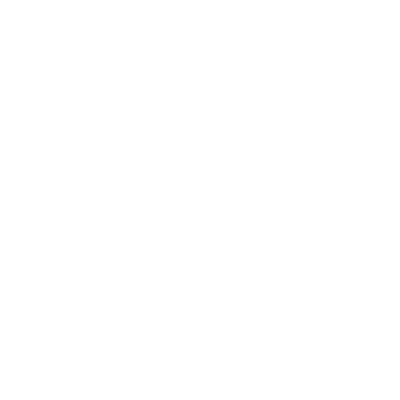

Iter: 20000
D loss: 0.6595
G_loss: 2.607
()


<IPython.core.display.Javascript object>


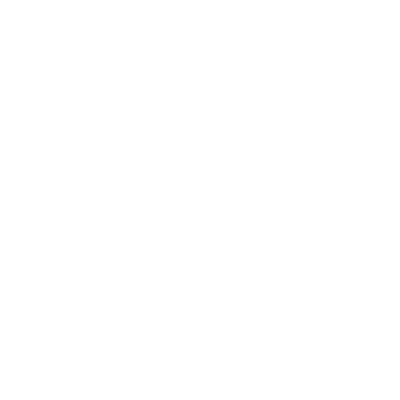

Iter: 30000
D loss: 0.5405
G_loss: 2.523
()


<IPython.core.display.Javascript object>


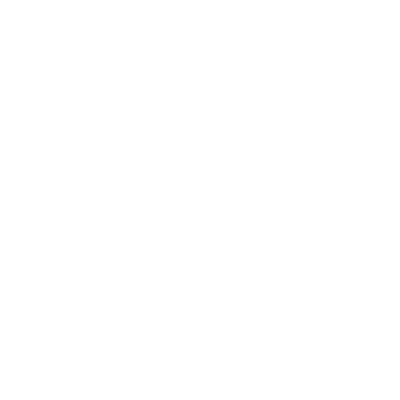

Iter: 40000
D loss: 0.4975
G_loss: 2.483
()


<IPython.core.display.Javascript object>


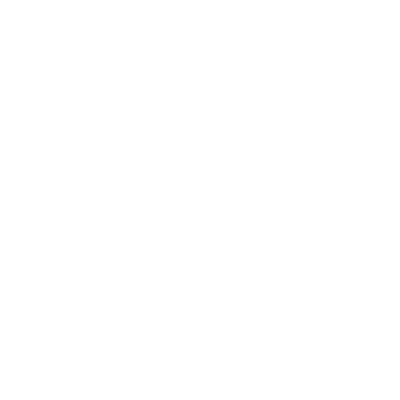

Iter: 50000
D loss: 0.4717
G_loss: 2.578
()


<IPython.core.display.Javascript object>


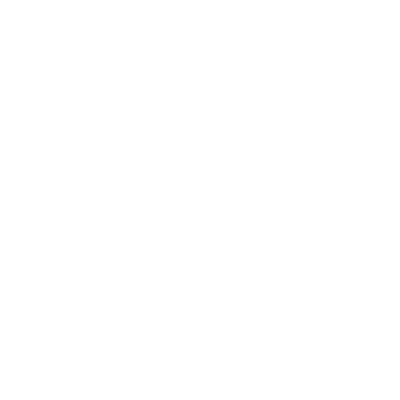

Iter: 60000
D loss: 0.592
G_loss: 2.678
()


<IPython.core.display.Javascript object>


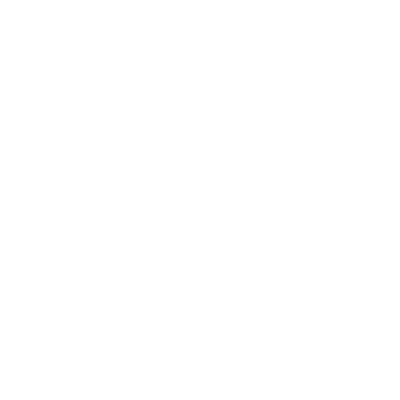

Iter: 70000
D loss: 0.5801
G_loss: 2.812
()


<IPython.core.display.Javascript object>


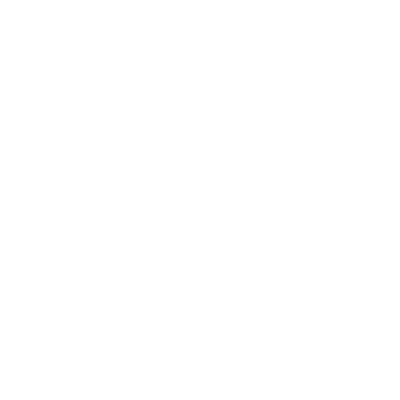

Iter: 80000
D loss: 0.3513
G_loss: 2.41
()


<IPython.core.display.Javascript object>


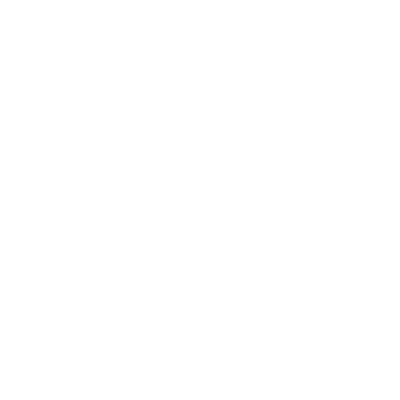

Iter: 90000
D loss: 0.5362
G_loss: 2.715
()


<IPython.core.display.Javascript object>


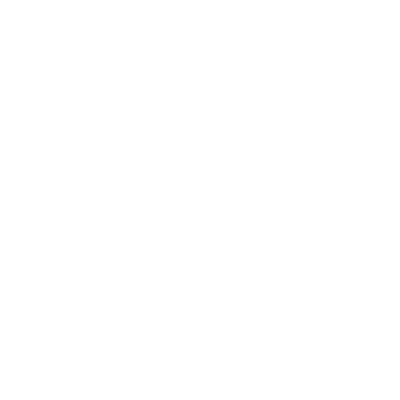

Iter: 100000
D loss: 0.4221
G_loss: 3.101
()


<IPython.core.display.Javascript object>


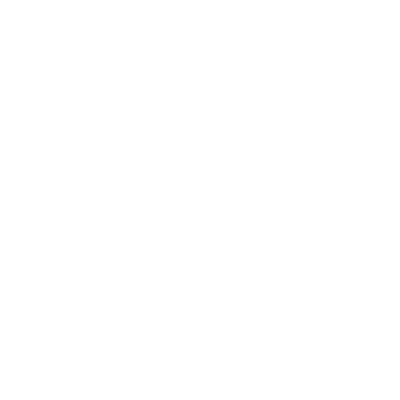

Iter: 110000
D loss: 0.4493
G_loss: 2.57
()


<IPython.core.display.Javascript object>


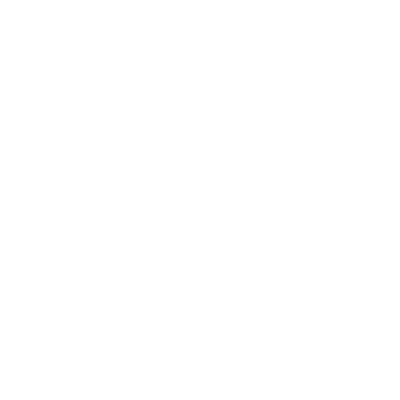

Iter: 120000
D loss: 0.4606
G_loss: 2.883
()


<IPython.core.display.Javascript object>


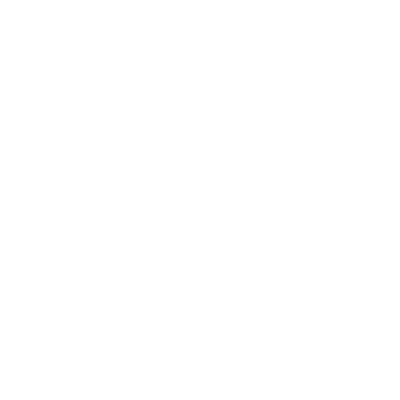

Iter: 130000
D loss: 0.4529
G_loss: 2.934
()


<IPython.core.display.Javascript object>


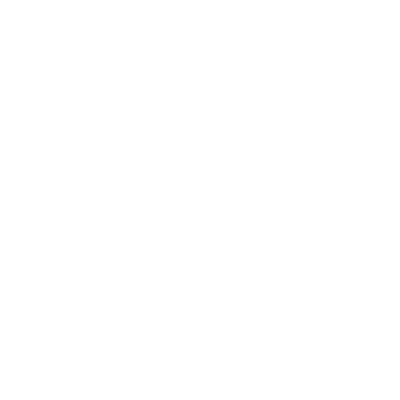

Iter: 140000
D loss: 0.3328
G_loss: 2.95
()


<IPython.core.display.Javascript object>


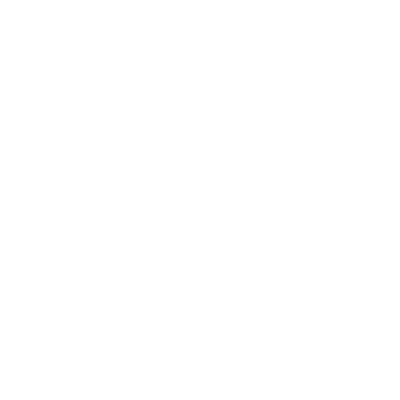

Iter: 150000
D loss: 0.4198
G_loss: 2.507
()


<IPython.core.display.Javascript object>


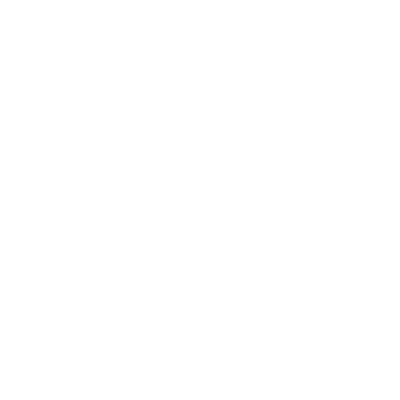

Iter: 160000
D loss: 0.279
G_loss: 3.114
()


<IPython.core.display.Javascript object>


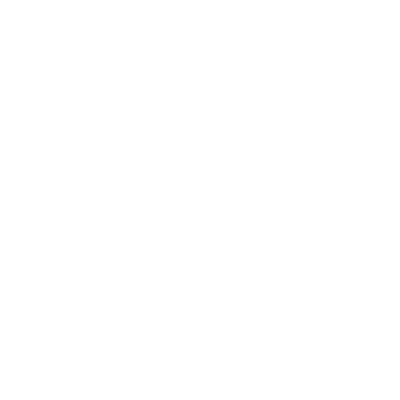

Iter: 170000
D loss: 0.3225
G_loss: 2.722
()


<IPython.core.display.Javascript object>


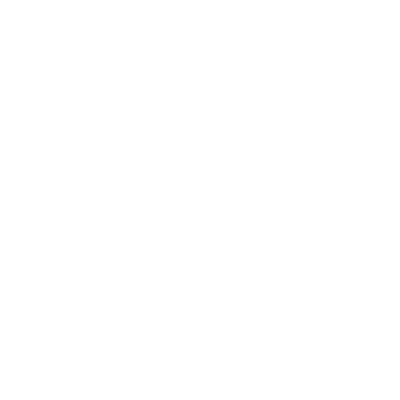

Iter: 180000
D loss: 0.2927
G_loss: 2.782
()


<IPython.core.display.Javascript object>


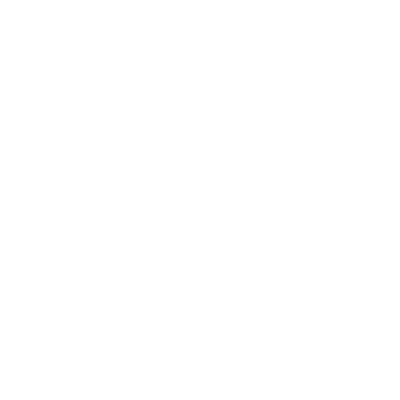

Iter: 190000
D loss: 0.3105
G_loss: 2.663
()


<IPython.core.display.Javascript object>


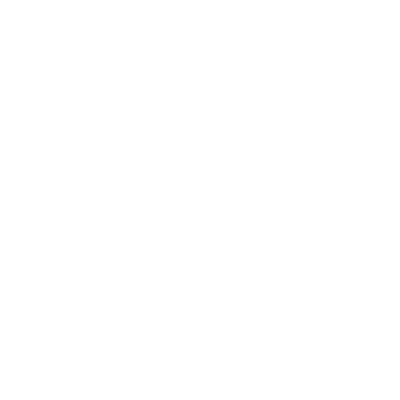

Iter: 200000
D loss: 0.3449
G_loss: 2.779
()


<IPython.core.display.Javascript object>


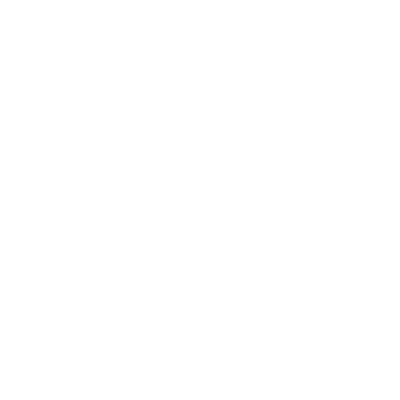

Iter: 210000
D loss: 0.2337
G_loss: 2.978
()


<IPython.core.display.Javascript object>


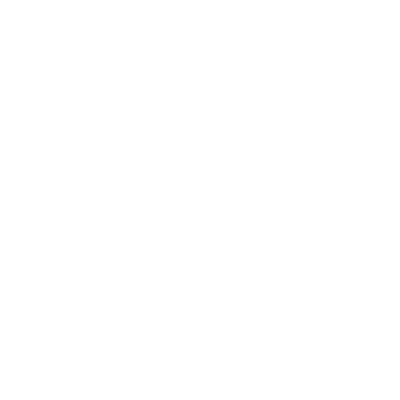

Iter: 220000
D loss: 0.2355
G_loss: 2.886
()


<IPython.core.display.Javascript object>


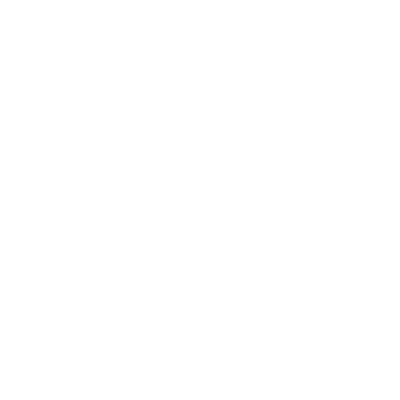

Iter: 230000
D loss: 0.2511
G_loss: 2.903
()


<IPython.core.display.Javascript object>


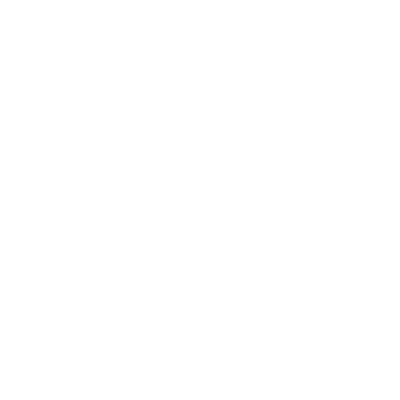

Iter: 240000
D loss: 0.2795
G_loss: 3.043
()


<IPython.core.display.Javascript object>


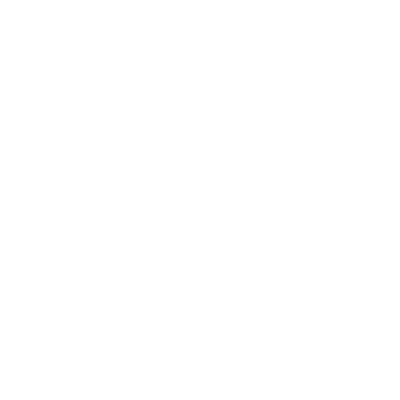

Iter: 250000
D loss: 0.2899
G_loss: 2.896
()


<IPython.core.display.Javascript object>


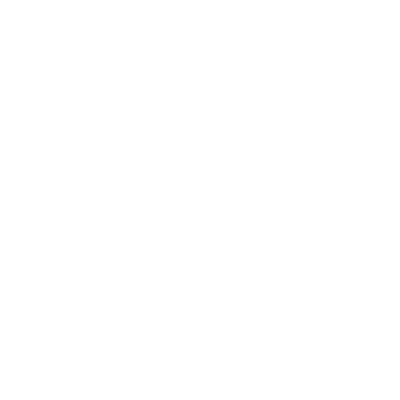

Iter: 260000
D loss: 0.3241
G_loss: 2.825
()


<IPython.core.display.Javascript object>


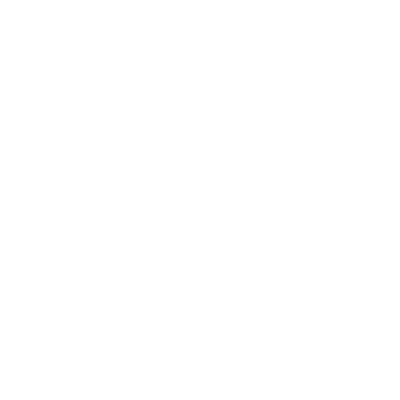

Iter: 270000
D loss: 0.2756
G_loss: 3.015
()


<IPython.core.display.Javascript object>


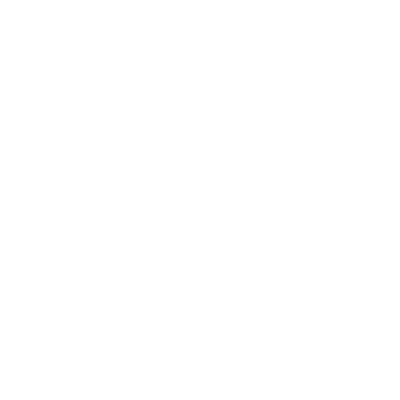

Iter: 280000
D loss: 0.2575
G_loss: 3.148
()


<IPython.core.display.Javascript object>


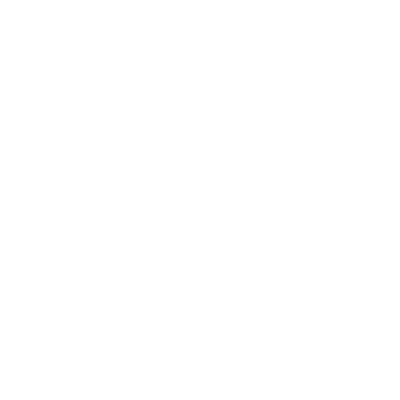

Iter: 290000
D loss: 0.2437
G_loss: 2.708
()


<IPython.core.display.Javascript object>


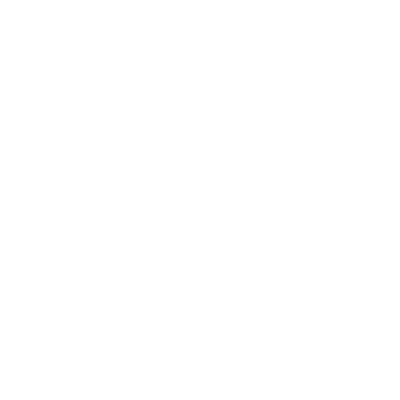

Iter: 300000
D loss: 0.1556
G_loss: 3.101
()


<IPython.core.display.Javascript object>


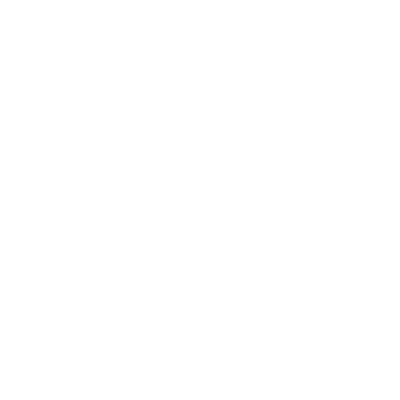

Iter: 310000
D loss: 0.1929
G_loss: 3.555
()


<IPython.core.display.Javascript object>


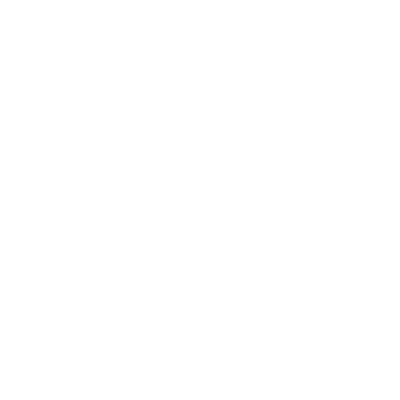

Iter: 320000
D loss: 0.19
G_loss: 3.315
()


<IPython.core.display.Javascript object>


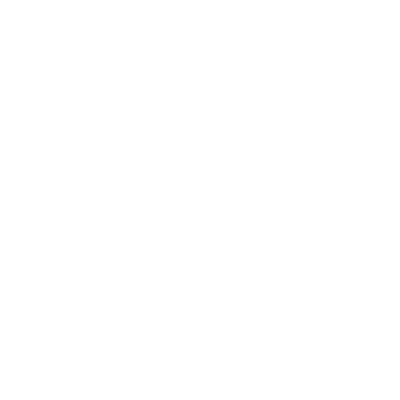

Iter: 330000
D loss: 0.2422
G_loss: 3.469
()


<IPython.core.display.Javascript object>


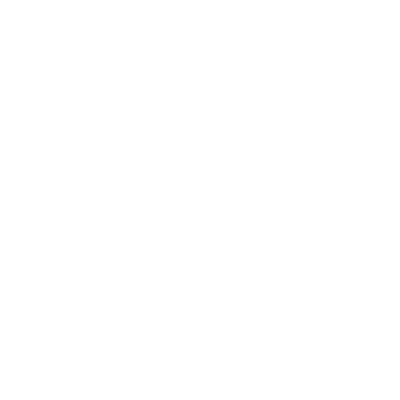

Iter: 340000
D loss: 0.2209
G_loss: 3.568
()


<IPython.core.display.Javascript object>


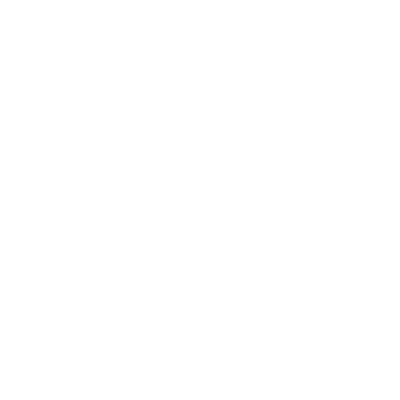

Iter: 350000
D loss: 0.3126
G_loss: 3.299
()


<IPython.core.display.Javascript object>


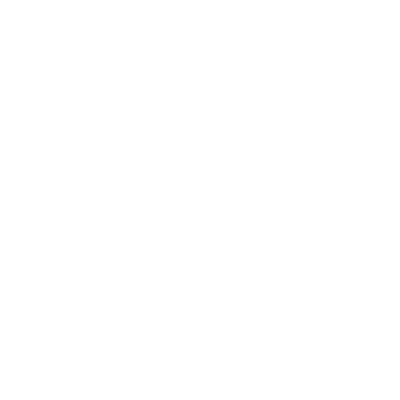

Iter: 360000
D loss: 0.2048
G_loss: 3.171
()


<IPython.core.display.Javascript object>


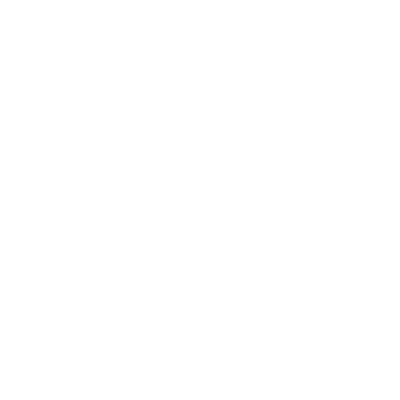

Iter: 370000
D loss: 0.1359
G_loss: 3.02
()


<IPython.core.display.Javascript object>


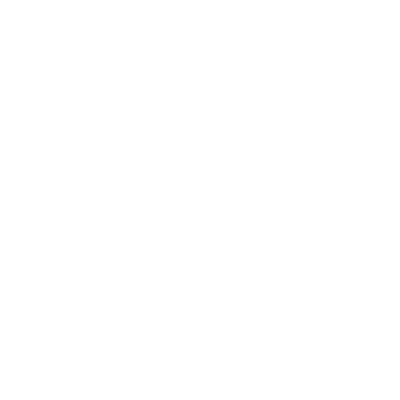

Iter: 380000
D loss: 0.1464
G_loss: 3.553
()


<IPython.core.display.Javascript object>


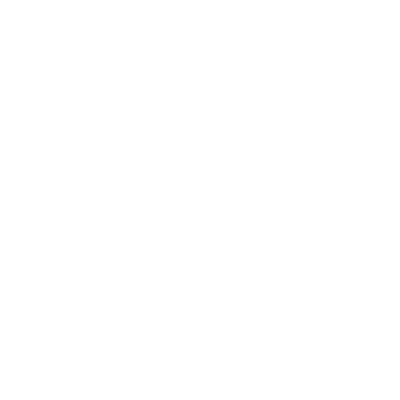

Iter: 390000
D loss: 0.2733
G_loss: 3.965
()


<IPython.core.display.Javascript object>


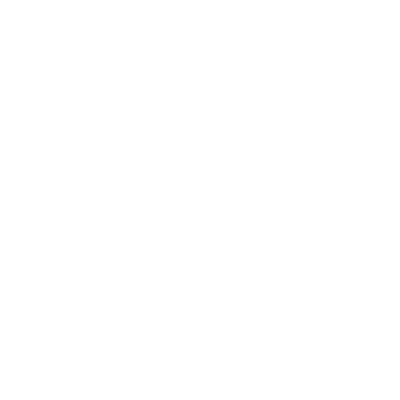

Iter: 400000
D loss: 0.2131
G_loss: 3.669
()


<IPython.core.display.Javascript object>


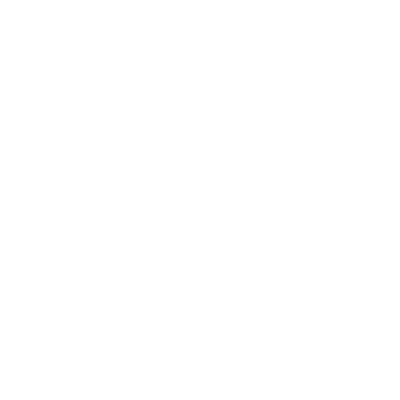

Iter: 410000
D loss: 0.175
G_loss: 3.453
()


<IPython.core.display.Javascript object>


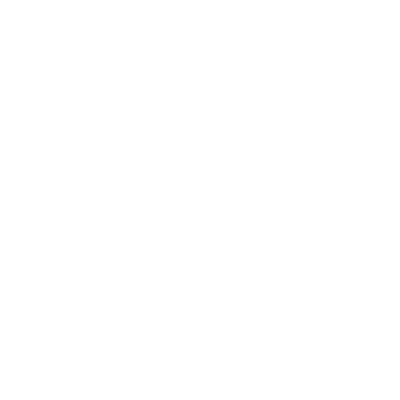

Iter: 420000
D loss: 0.1504
G_loss: 3.708
()


<IPython.core.display.Javascript object>


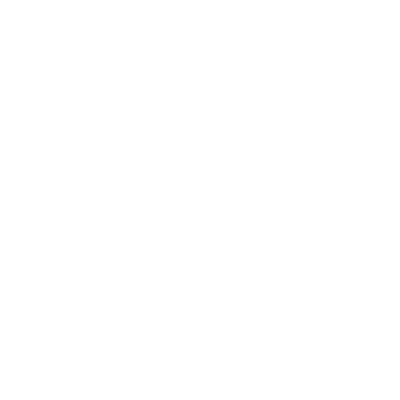

Iter: 430000
D loss: 0.1153
G_loss: 3.912
()


<IPython.core.display.Javascript object>


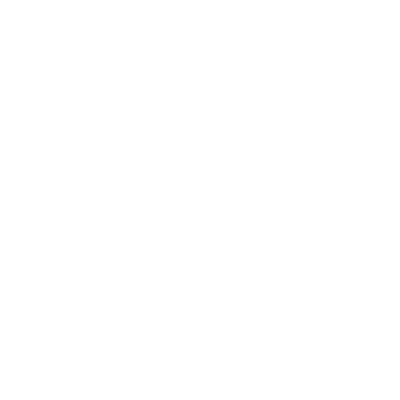

Iter: 440000
D loss: 0.2082
G_loss: 3.323
()


<IPython.core.display.Javascript object>


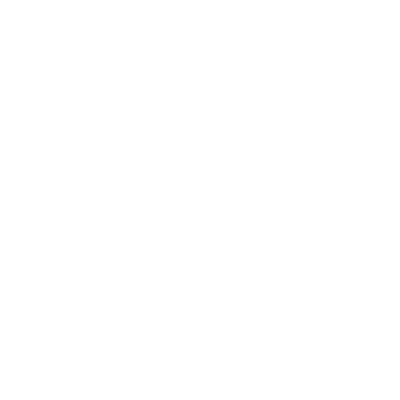

Iter: 450000
D loss: 0.2243
G_loss: 3.615
()


<IPython.core.display.Javascript object>


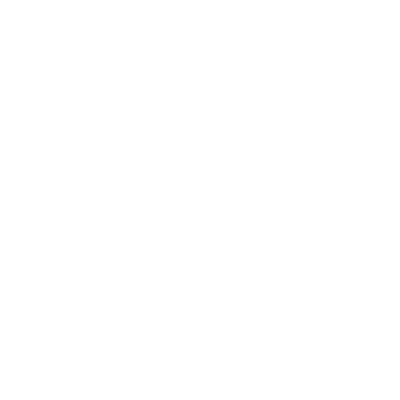

Iter: 460000
D loss: 0.24
G_loss: 3.302
()


<IPython.core.display.Javascript object>


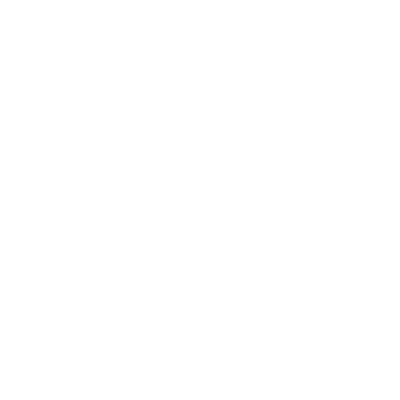

Iter: 470000
D loss: 0.342
G_loss: 3.427
()


<IPython.core.display.Javascript object>


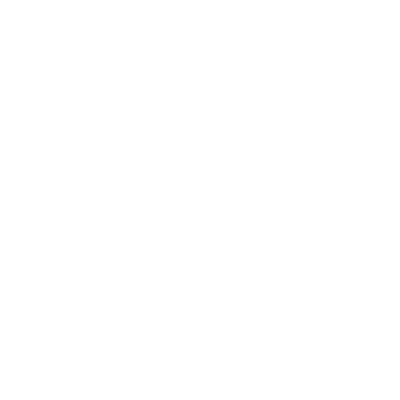

Iter: 480000
D loss: 0.3038
G_loss: 3.225
()


<IPython.core.display.Javascript object>


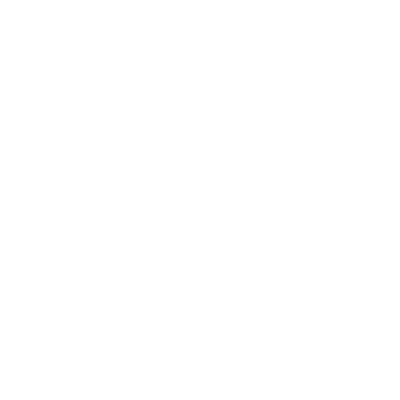

Iter: 490000
D loss: 0.2558
G_loss: 3.309
()


<IPython.core.display.Javascript object>


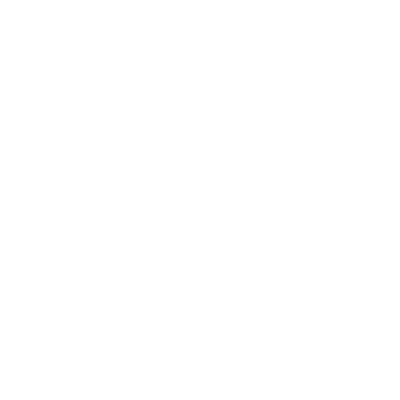

Iter: 500000
D loss: 0.2337
G_loss: 3.103
()


<IPython.core.display.Javascript object>


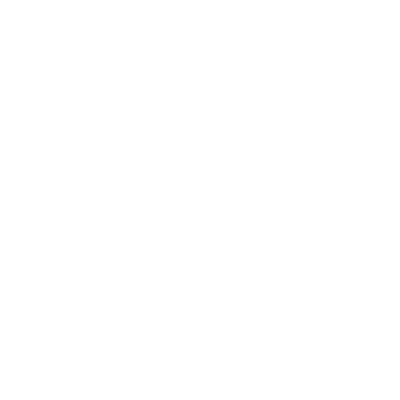

Iter: 510000
D loss: 0.2022
G_loss: 3.75
()


<IPython.core.display.Javascript object>


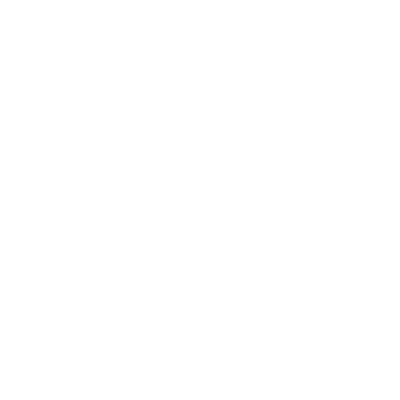

Iter: 520000
D loss: 0.1838
G_loss: 3.453
()


<IPython.core.display.Javascript object>


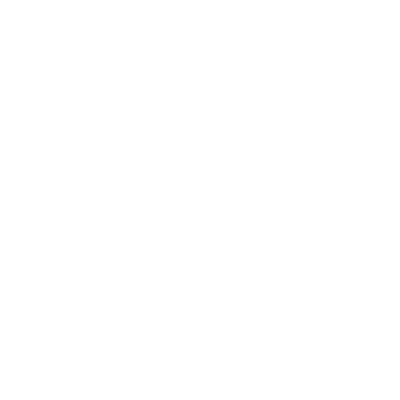

Iter: 530000
D loss: 0.1543
G_loss: 3.491
()


<IPython.core.display.Javascript object>


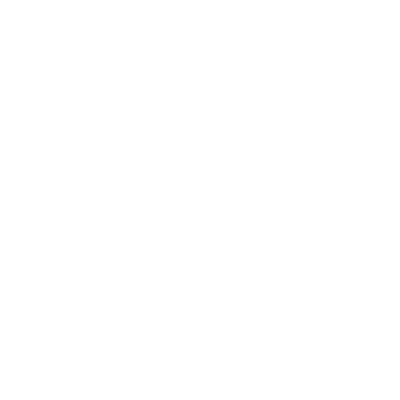

Iter: 540000
D loss: 0.1607
G_loss: 3.468
()


<IPython.core.display.Javascript object>


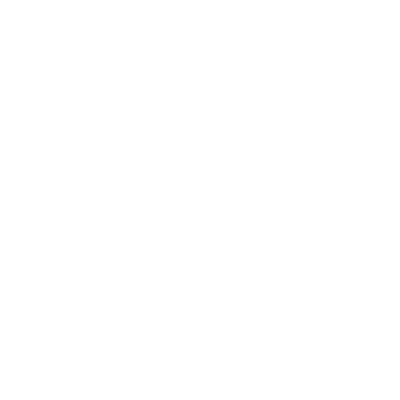

Iter: 550000
D loss: 0.1456
G_loss: 3.369
()


<IPython.core.display.Javascript object>


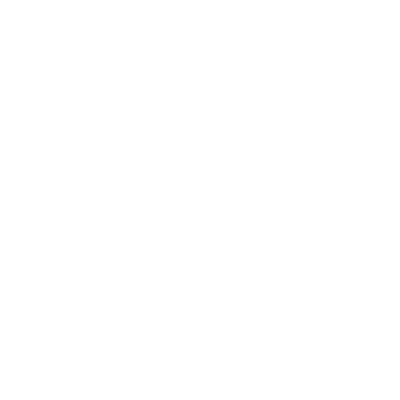

Iter: 560000
D loss: 0.1421
G_loss: 3.581
()


<IPython.core.display.Javascript object>


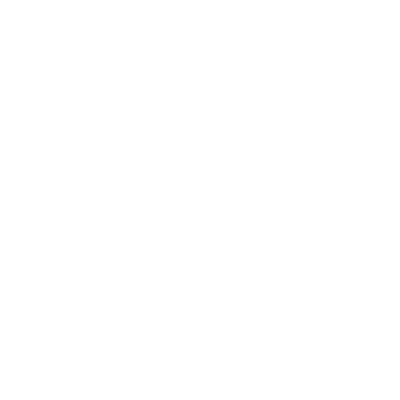

Iter: 570000
D loss: 0.1922
G_loss: 3.751
()


<IPython.core.display.Javascript object>


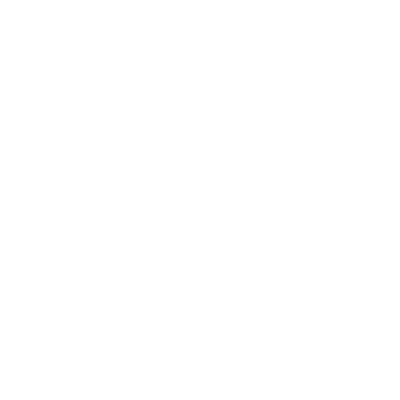

Iter: 580000
D loss: 0.141
G_loss: 3.904
()


<IPython.core.display.Javascript object>


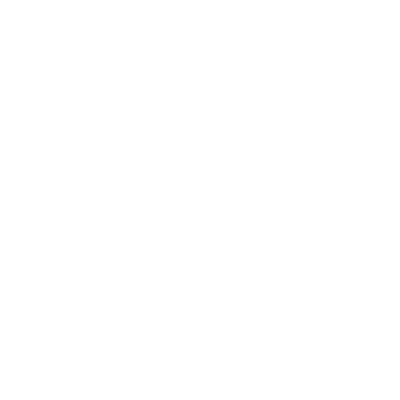

Iter: 590000
D loss: 0.1445
G_loss: 3.844
()


<IPython.core.display.Javascript object>


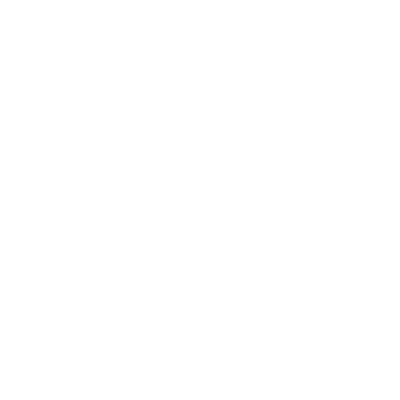

Iter: 600000
D loss: 0.1423
G_loss: 3.473
()


<IPython.core.display.Javascript object>


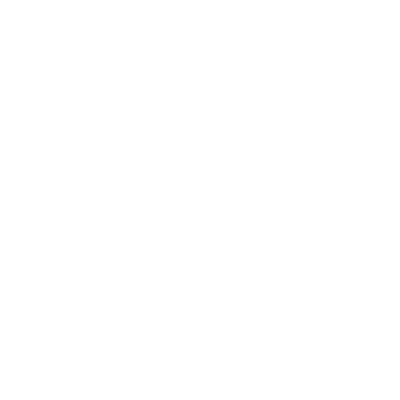

Iter: 610000
D loss: 0.1516
G_loss: 4.258
()


<IPython.core.display.Javascript object>


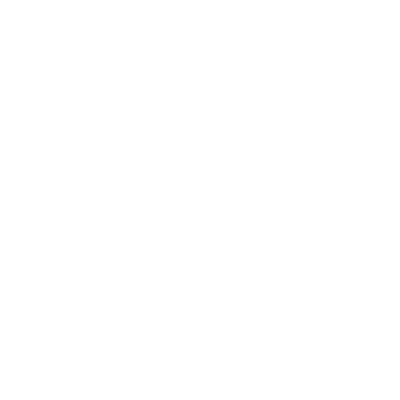

Iter: 620000
D loss: 0.1271
G_loss: 3.851
()


<IPython.core.display.Javascript object>


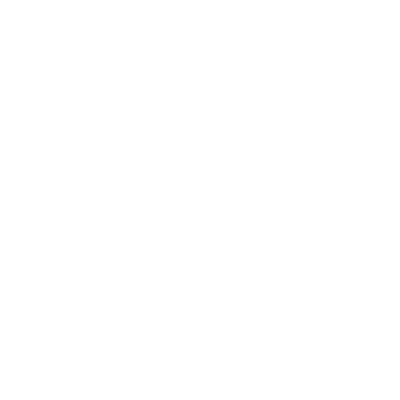

Iter: 630000
D loss: 0.1723
G_loss: 3.666
()


<IPython.core.display.Javascript object>


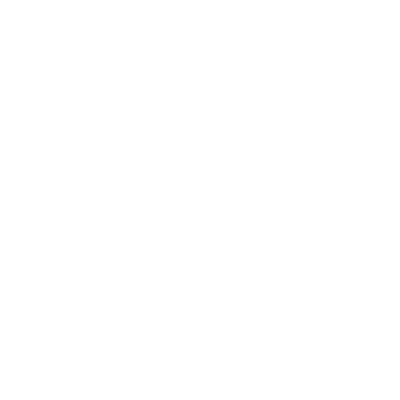

Iter: 640000
D loss: 0.0758
G_loss: 3.571
()


<IPython.core.display.Javascript object>


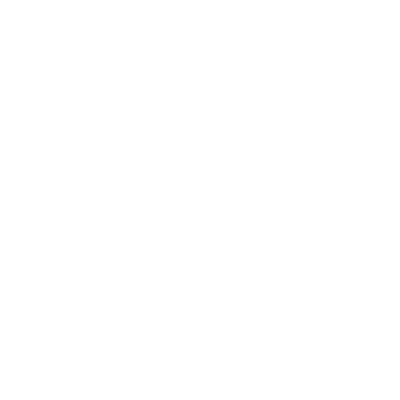

Iter: 650000
D loss: 0.1077
G_loss: 4.263
()


<IPython.core.display.Javascript object>


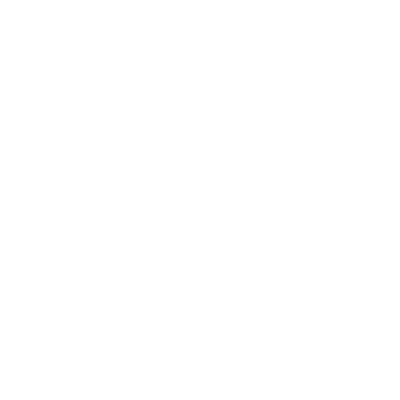

Iter: 660000
D loss: 0.218
G_loss: 4.09
()


<IPython.core.display.Javascript object>


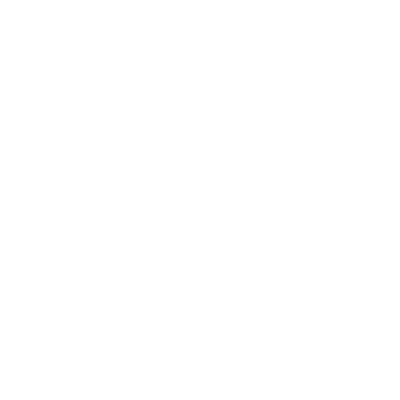

Iter: 670000
D loss: 0.2602
G_loss: 3.859
()


<IPython.core.display.Javascript object>


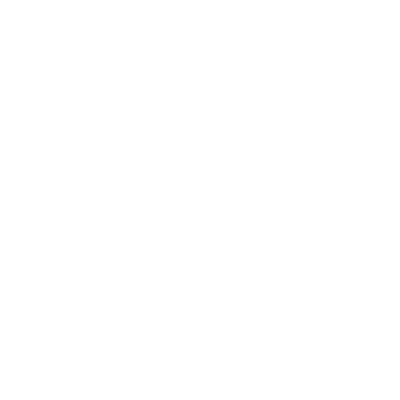

Iter: 680000
D loss: 0.1718
G_loss: 3.86
()


<IPython.core.display.Javascript object>


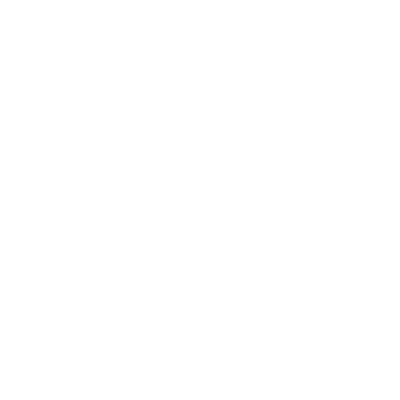

Iter: 690000
D loss: 0.09432
G_loss: 3.61
()


<IPython.core.display.Javascript object>


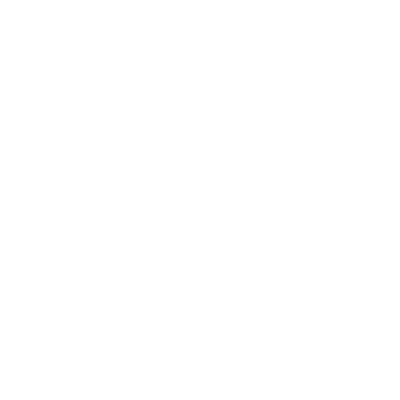

Iter: 700000
D loss: 0.1503
G_loss: 3.973
()


<IPython.core.display.Javascript object>


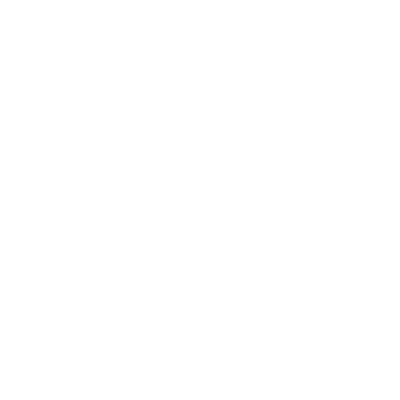

Iter: 710000
D loss: 0.08034
G_loss: 4.617
()


<IPython.core.display.Javascript object>


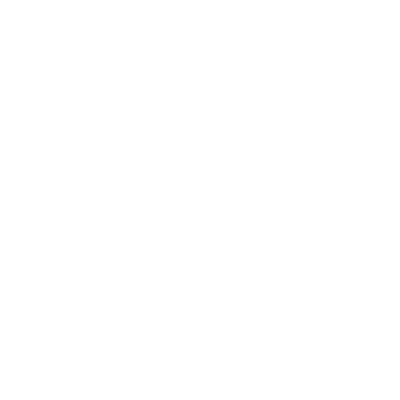

Iter: 720000
D loss: 0.1604
G_loss: 3.921
()


<IPython.core.display.Javascript object>


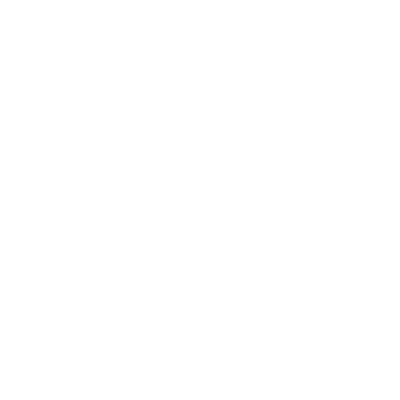

Iter: 730000
D loss: 0.1519
G_loss: 4.032
()


<IPython.core.display.Javascript object>


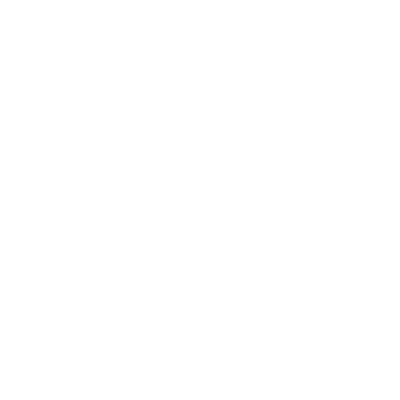

Iter: 740000
D loss: 0.1291
G_loss: 4.069
()


<IPython.core.display.Javascript object>


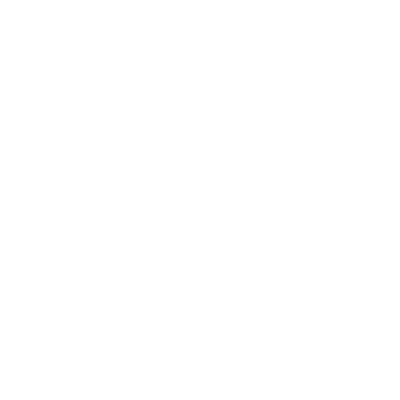

Iter: 750000
D loss: 0.07045
G_loss: 4.116
()


<IPython.core.display.Javascript object>


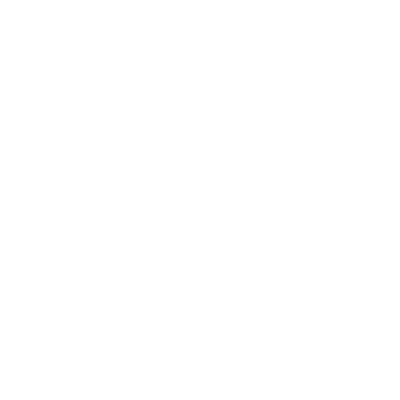

Iter: 760000
D loss: 0.1585
G_loss: 3.819
()


<IPython.core.display.Javascript object>


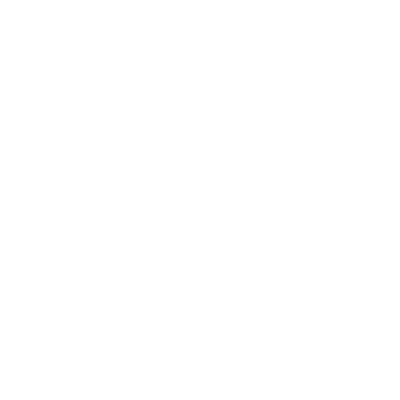

Iter: 770000
D loss: 0.1341
G_loss: 4.269
()


<IPython.core.display.Javascript object>


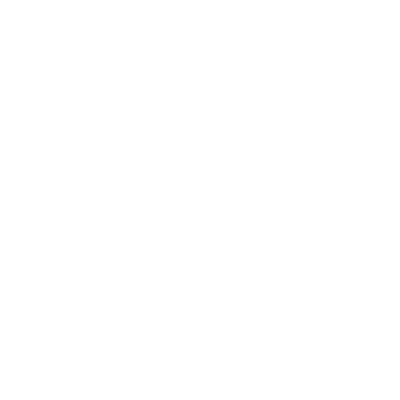

Iter: 780000
D loss: 0.1681
G_loss: 3.979
()


<IPython.core.display.Javascript object>


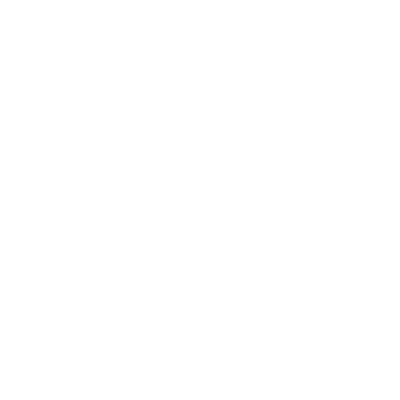

Iter: 790000
D loss: 0.09705
G_loss: 3.932
()


<IPython.core.display.Javascript object>


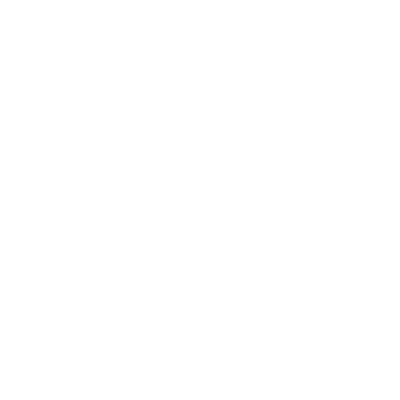

Iter: 800000
D loss: 0.2379
G_loss: 4.017
()


<IPython.core.display.Javascript object>


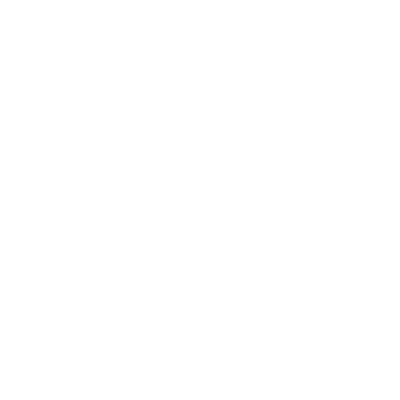

Iter: 810000
D loss: 0.08681
G_loss: 3.765
()


<IPython.core.display.Javascript object>


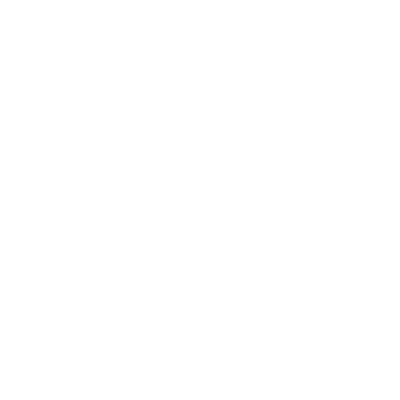

Iter: 820000
D loss: 0.2437
G_loss: 4.213
()


<IPython.core.display.Javascript object>


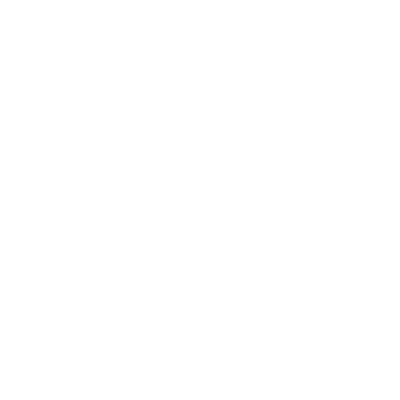

Iter: 830000
D loss: 0.1306
G_loss: 4.29
()


<IPython.core.display.Javascript object>


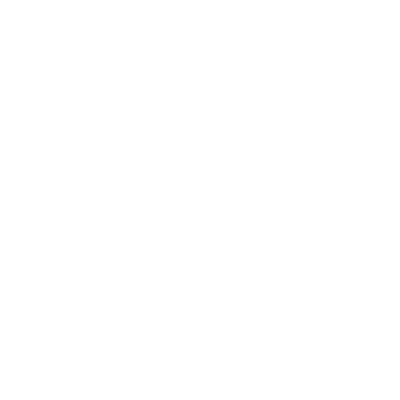

Iter: 840000
D loss: 0.1475
G_loss: 3.99
()


<IPython.core.display.Javascript object>


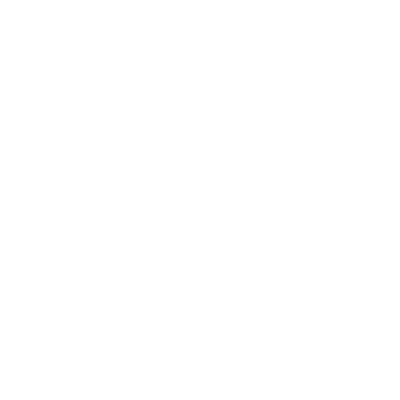

Iter: 850000
D loss: 0.1586
G_loss: 4.088
()


<IPython.core.display.Javascript object>


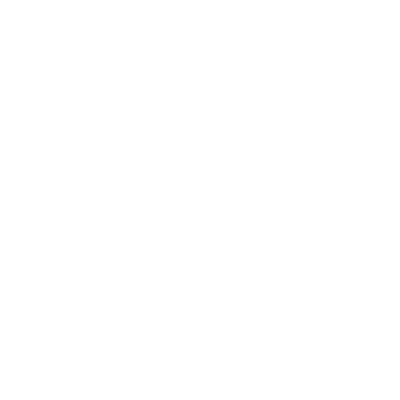

Iter: 860000
D loss: 0.08928
G_loss: 3.915
()


<IPython.core.display.Javascript object>


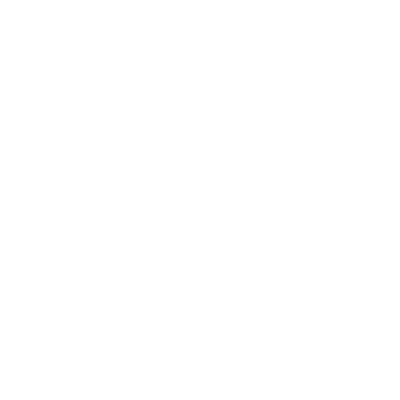

Iter: 870000
D loss: 0.1416
G_loss: 3.993
()


<IPython.core.display.Javascript object>


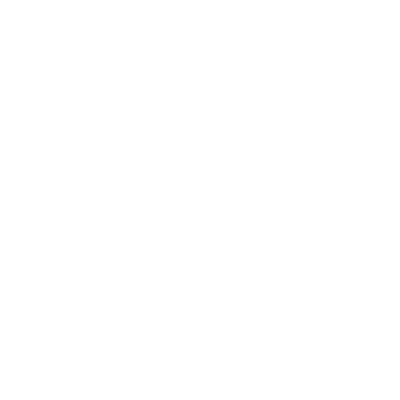

Iter: 880000
D loss: 0.1075
G_loss: 3.926
()


<IPython.core.display.Javascript object>


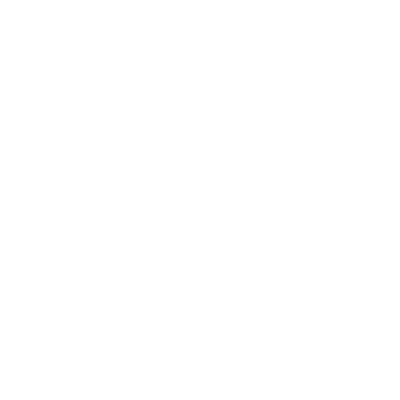

Iter: 890000
D loss: 0.1414
G_loss: 4.079
()


<IPython.core.display.Javascript object>


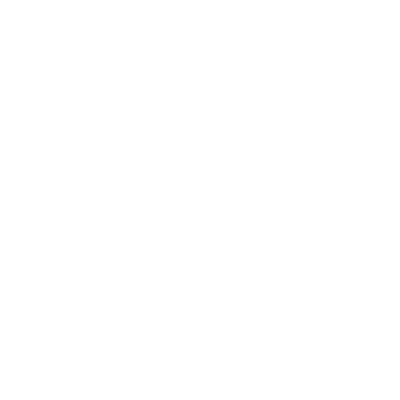

Iter: 900000
D loss: 0.1256
G_loss: 3.817
()


<IPython.core.display.Javascript object>


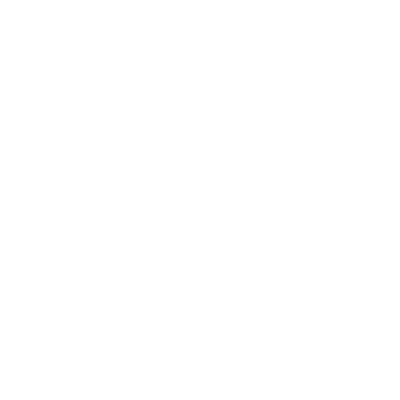

Iter: 910000
D loss: 0.06909
G_loss: 4.584
()


<IPython.core.display.Javascript object>


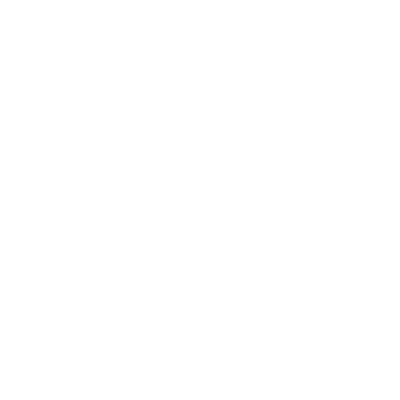

Iter: 920000
D loss: 0.1727
G_loss: 4.307
()


<IPython.core.display.Javascript object>


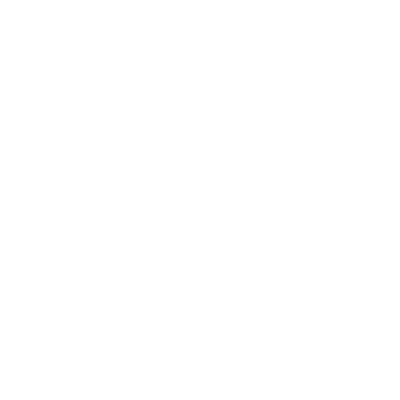

Iter: 930000
D loss: 0.115
G_loss: 4.188
()


<IPython.core.display.Javascript object>


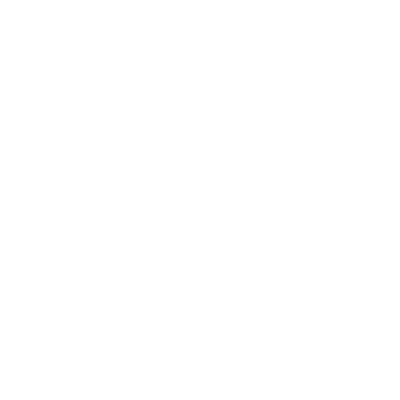

Iter: 940000
D loss: 0.1902
G_loss: 4.459
()


<IPython.core.display.Javascript object>


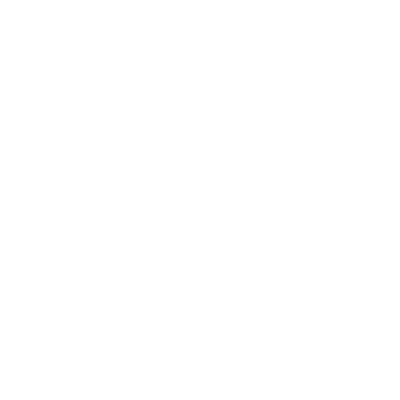

Iter: 950000
D loss: 0.1965
G_loss: 4.239
()


<IPython.core.display.Javascript object>


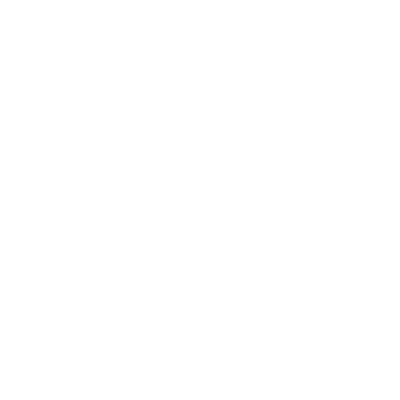

Iter: 960000
D loss: 0.1358
G_loss: 4.173
()


<IPython.core.display.Javascript object>


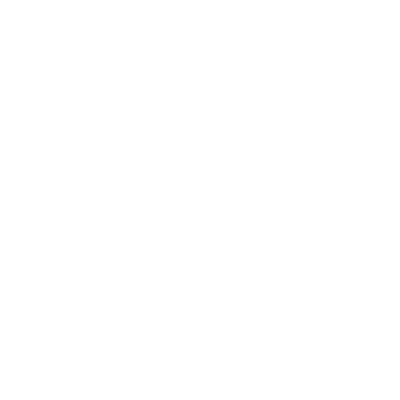

Iter: 970000
D loss: 0.1451
G_loss: 3.944
()


<IPython.core.display.Javascript object>


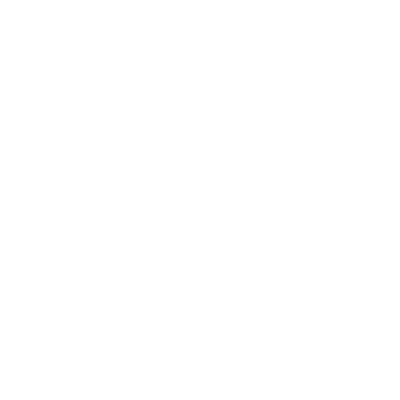

Iter: 980000
D loss: 0.1598
G_loss: 4.576
()


<IPython.core.display.Javascript object>


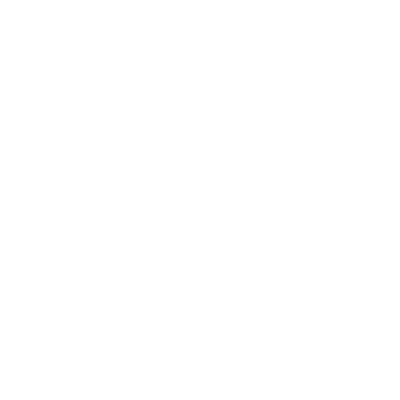

Iter: 990000
D loss: 0.07005
G_loss: 4.14
()


In [15]:
i = 0

for it in range(1000000):
    if it % 10000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 10000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()